# Working with APIs

API stands for Application programming interface<br>
APIs are a way for applications to talk to eachother<br>
In python we use the requests package to handle the connection<br>
<small><strong>Note: It is requests with an s not request(this is a different package)</strong></small><br>
Most API's communicate with data in the form of JSON<br>
JSON stands for JavaScript Object Notation

In [1]:
#import the packages we need:
import requests, json

We will be connecting to the Ergast F1 Racer API today:
http://ergast.com/mrd/

to view JSON data nicely in the Chrome browser install the extension JSONview

In [3]:
#help(requests)

In [2]:
url = 'http://ergast.com/api/f1/2008/5/driverStandings.json'

In [3]:
#response object
response = requests.get(url)
print(response)

<Response [200]>


In [4]:
#check and make sure we got a successful response from the API
response.ok

True

In [5]:
#view the response as a JSON
response.json()

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2008/5/driverstandings.json',
  'limit': '30',
  'offset': '0',
  'total': '22',
  'StandingsTable': {'season': '2008',
   'round': '5',
   'StandingsLists': [{'season': '2008',
     'round': '5',
     'DriverStandings': [{'position': '1',
       'positionText': '1',
       'points': '35',
       'wins': '2',
       'Driver': {'driverId': 'raikkonen',
        'permanentNumber': '7',
        'code': 'RAI',
        'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen',
        'givenName': 'Kimi',
        'familyName': 'Räikkönen',
        'dateOfBirth': '1979-10-17',
        'nationality': 'Finnish'},
       'Constructors': [{'constructorId': 'ferrari',
         'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
         'name': 'Ferrari',
         'nationality': 'Italian'}]},
      {'position': '2',
       'positionText': '2',
       'points': '28',
       'wins': '2',
 

In [6]:
type(response.json())

dict

In [7]:
# We only want the Driver Standings
# for x in range(5):
#     data = response.json()['MRData']['StandingsTable']['StandingsLists'][0]["DriverStandings"][x]["Driver"]["familyName"]
#     print(data)

my_racer_data = response.json()['MRData']['StandingsTable']['StandingsLists'][0]["DriverStandings"]
print(my_racer_data)

[{'position': '1', 'positionText': '1', 'points': '35', 'wins': '2', 'Driver': {'driverId': 'raikkonen', 'permanentNumber': '7', 'code': 'RAI', 'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen', 'givenName': 'Kimi', 'familyName': 'Räikkönen', 'dateOfBirth': '1979-10-17', 'nationality': 'Finnish'}, 'Constructors': [{'constructorId': 'ferrari', 'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari', 'name': 'Ferrari', 'nationality': 'Italian'}]}, {'position': '2', 'positionText': '2', 'points': '28', 'wins': '2', 'Driver': {'driverId': 'massa', 'permanentNumber': '19', 'code': 'MAS', 'url': 'http://en.wikipedia.org/wiki/Felipe_Massa', 'givenName': 'Felipe', 'familyName': 'Massa', 'dateOfBirth': '1981-04-25', 'nationality': 'Brazilian'}, 'Constructors': [{'constructorId': 'ferrari', 'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari', 'name': 'Ferrari', 'nationality': 'Italian'}]}, {'position': '3', 'positionText': '3', 'points': '28', 'wins': '1', 'Driver': {'driverId': '

In [8]:
def get_racer_info(data):
    new_data = []
    for racer in data:
        racer_dict = {}
        racer_name = f'{racer["Driver"]["givenName"]} {racer["Driver"]["familyName"]}'
        
        racer_dict[racer_name] = {
            'first_name':racer['Driver']['givenName'],
            'last_name':racer['Driver']['familyName'],
            'position':racer['position'],
            'wins':racer['wins'],
            'DOB':racer['Driver']['dateOfBirth'],
            'natinality': racer['Driver']['nationality'],
            'constructor': racer['Constructors'][0]['name']
        }
        new_data.append(racer_dict)
    return new_data

get_racer_info(my_racer_data)

[{'Kimi Räikkönen': {'first_name': 'Kimi',
   'last_name': 'Räikkönen',
   'position': '1',
   'wins': '2',
   'DOB': '1979-10-17',
   'natinality': 'Finnish',
   'constructor': 'Ferrari'}},
 {'Felipe Massa': {'first_name': 'Felipe',
   'last_name': 'Massa',
   'position': '2',
   'wins': '2',
   'DOB': '1981-04-25',
   'natinality': 'Brazilian',
   'constructor': 'Ferrari'}},
 {'Lewis Hamilton': {'first_name': 'Lewis',
   'last_name': 'Hamilton',
   'position': '3',
   'wins': '1',
   'DOB': '1985-01-07',
   'natinality': 'British',
   'constructor': 'McLaren'}},
 {'Robert Kubica': {'first_name': 'Robert',
   'last_name': 'Kubica',
   'position': '4',
   'wins': '0',
   'DOB': '1984-12-07',
   'natinality': 'Polish',
   'constructor': 'BMW Sauber'}},
 {'Nick Heidfeld': {'first_name': 'Nick',
   'last_name': 'Heidfeld',
   'position': '5',
   'wins': '0',
   'DOB': '1977-05-10',
   'natinality': 'German',
   'constructor': 'BMW Sauber'}},
 {'Heikki Kovalainen': {'first_name': 'Heikki',

In [9]:
def get_driver_info_by_year_and_round(year,r):
    url = f"http://ergast.com/api/f1/{year}/{r}/driverStandings.json"
    response = requests.get(url)
    response_data = response.json()
    if not response_data["MRData"]["StandingsTable"]["StandingsLists"]:
        return "We had an error loading your data. It is likely the year or round is not in database"
    data = response_data["MRData"]["StandingsTable"]["StandingsLists"][0]["DriverStandings"]
    return get_racer_info(data)
    
get_driver_info_by_year_and_round(2019,4)       
    

[{'Valtteri Bottas': {'first_name': 'Valtteri',
   'last_name': 'Bottas',
   'position': '1',
   'wins': '2',
   'DOB': '1989-08-28',
   'natinality': 'Finnish',
   'constructor': 'Mercedes'}},
 {'Lewis Hamilton': {'first_name': 'Lewis',
   'last_name': 'Hamilton',
   'position': '2',
   'wins': '2',
   'DOB': '1985-01-07',
   'natinality': 'British',
   'constructor': 'Mercedes'}},
 {'Sebastian Vettel': {'first_name': 'Sebastian',
   'last_name': 'Vettel',
   'position': '3',
   'wins': '0',
   'DOB': '1987-07-03',
   'natinality': 'German',
   'constructor': 'Ferrari'}},
 {'Max Verstappen': {'first_name': 'Max',
   'last_name': 'Verstappen',
   'position': '4',
   'wins': '0',
   'DOB': '1997-09-30',
   'natinality': 'Dutch',
   'constructor': 'Red Bull'}},
 {'Charles Leclerc': {'first_name': 'Charles',
   'last_name': 'Leclerc',
   'position': '5',
   'wins': '0',
   'DOB': '1997-10-16',
   'natinality': 'Monegasque',
   'constructor': 'Ferrari'}},
 {'Sergio Pérez': {'first_name': '

# <strong>Homework</strong>
Retrieve a list of Pokemon's name, abilities, types, and weight from the PokeAPI
 https://pokeapi.co/

Make 20 Pokemon

Whenever you need to create a POKEMON, you need to construct your Pokemon through data from the API: https://pokeapi.co/

Below is an example of how your Pokemon should be categorized by Type.
Create a dictionary
{
<strong>'Fire'</strong>: {
'charizard': {
'abilities': [],
'weight': ,
},
'ninetales': {
'abilities': [],
'weight': ,
}
},
<strong>'Flying'</strong>:,
<strong>'Water'</strong>:
}

Remember, it may be easier to write functions to do your dirty work, and then call them to execute each topic, rather than trying to write a monstrous spaghetti-script that does it all at once; it also might be very good to plan how you'll go about this and what functions you might use before you write 500 lines of code that confuse and befuddle all who lay eyes upon it. Including yourself. An immense portion of good coding is just planning.

When you're done, create a GitHub repository for your assignment and save the repository link as the assignment.

Grass:
	Bulbasaur:
		Abilities: overgrow, chlorophyll
		Weight: 69


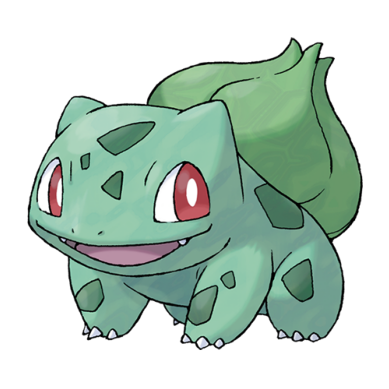

	Exeggcute:
		Abilities: chlorophyll, harvest
		Weight: 25


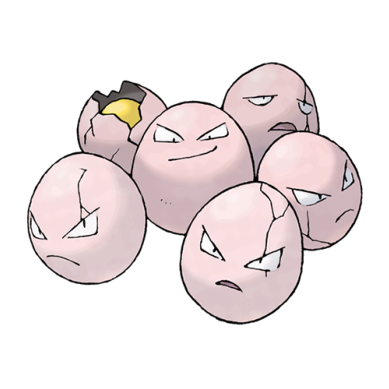

Poison:
	Bulbasaur:
		Abilities: overgrow, chlorophyll
		Weight: 69


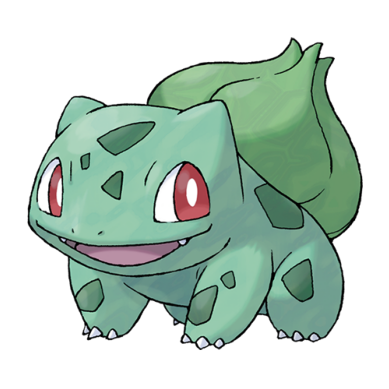

	Tentacool:
		Abilities: clear-body, liquid-ooze, rain-dish
		Weight: 455


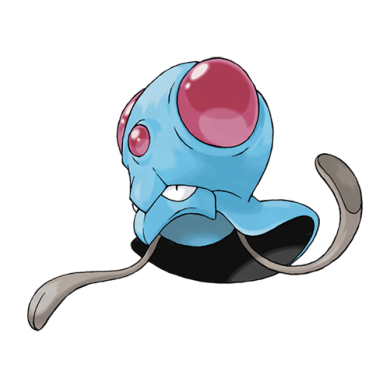

Fire:
	Charmander:
		Abilities: blaze, solar-power
		Weight: 85


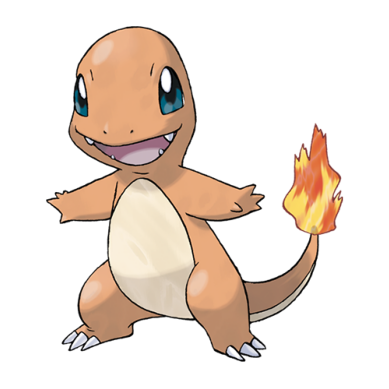

	Growlithe:
		Abilities: intimidate, flash-fire, justified
		Weight: 190


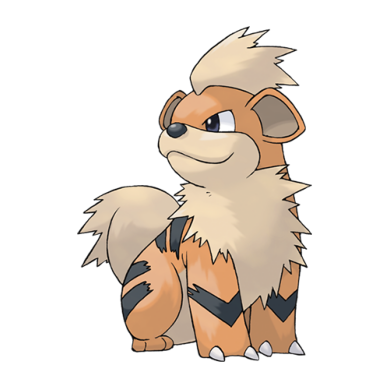

	Cyndaquil:
		Abilities: blaze, flash-fire
		Weight: 79


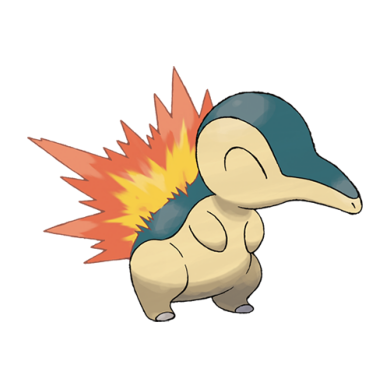

Water:
	Squirtle:
		Abilities: torrent, rain-dish
		Weight: 90


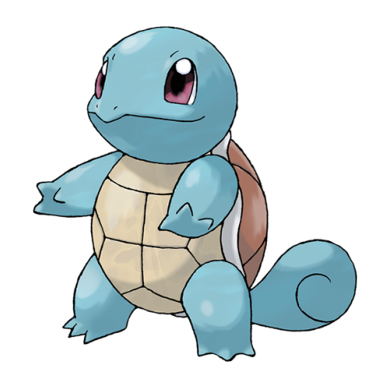

	Psyduck:
		Abilities: damp, cloud-nine, swift-swim
		Weight: 196


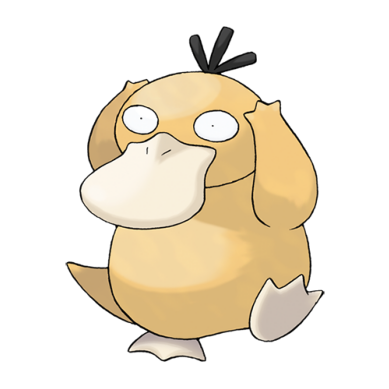

	Tentacool:
		Abilities: clear-body, liquid-ooze, rain-dish
		Weight: 455


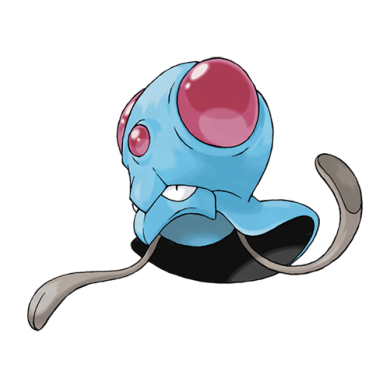

	Magikarp:
		Abilities: swift-swim, rattled
		Weight: 100


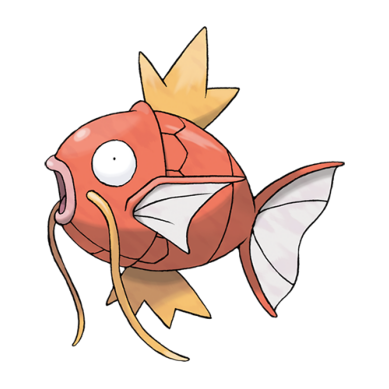

	Totodile:
		Abilities: torrent, sheer-force
		Weight: 95


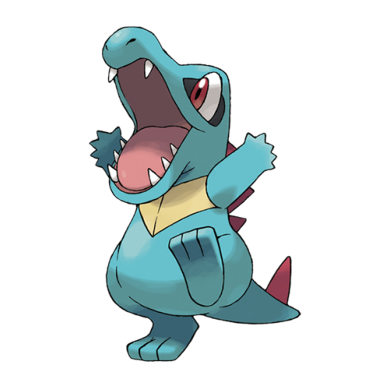

Electric:
	Pikachu:
		Abilities: static, lightning-rod
		Weight: 60


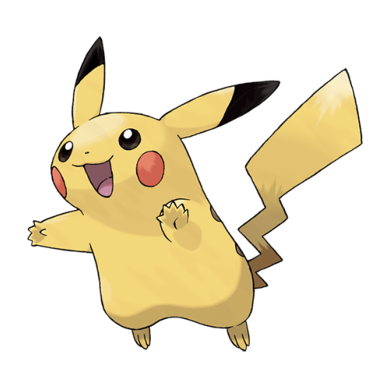

Normal:
	Jigglypuff:
		Abilities: cute-charm, competitive, friend-guard
		Weight: 55


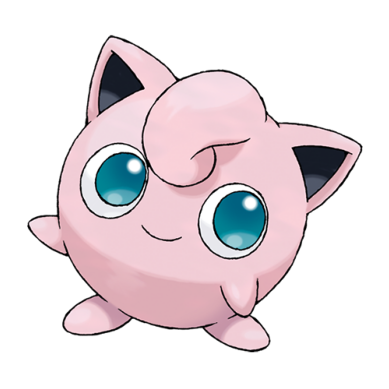

	Meowth:
		Abilities: pickup, technician, unnerve
		Weight: 42


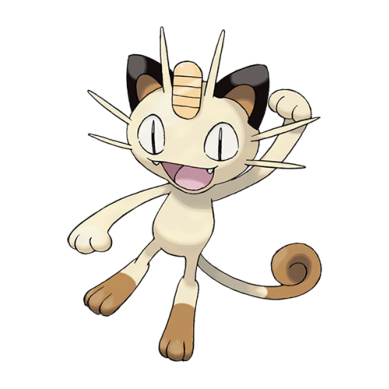

	Lickitung:
		Abilities: own-tempo, oblivious, cloud-nine
		Weight: 655


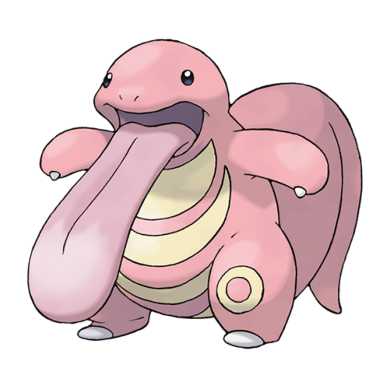

	Eevee:
		Abilities: run-away, adaptability, anticipation
		Weight: 65


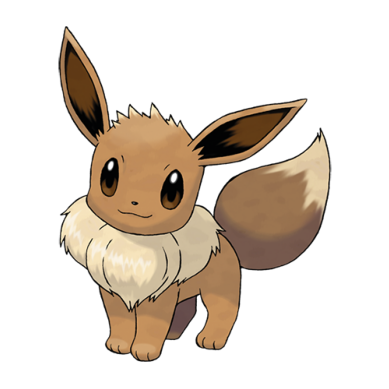

	Snorlax:
		Abilities: immunity, thick-fat, gluttony
		Weight: 4600


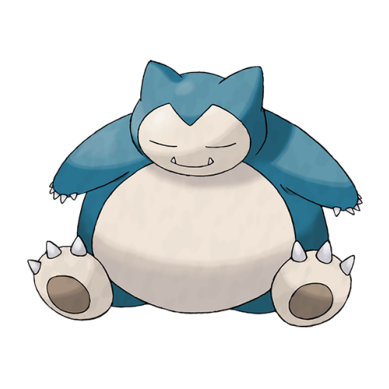

Fairy:
	Jigglypuff:
		Abilities: cute-charm, competitive, friend-guard
		Weight: 55


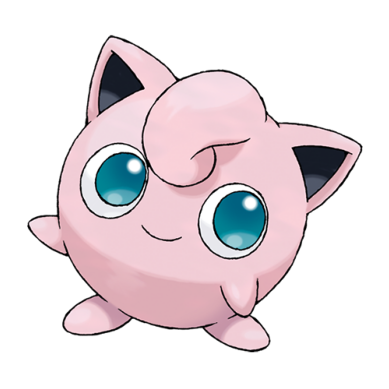

Fighting:
	Machop:
		Abilities: guts, no-guard, steadfast
		Weight: 195


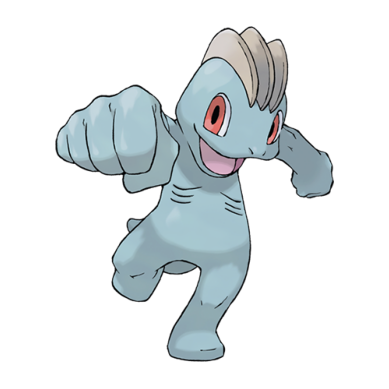

Rock:
	Geodude:
		Abilities: rock-head, sturdy, sand-veil
		Weight: 200


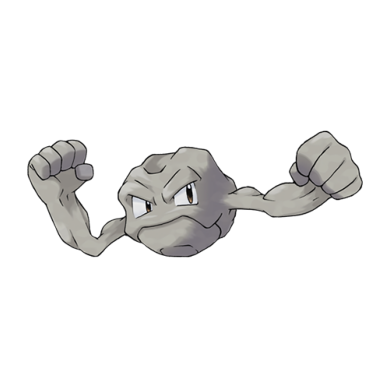

Ground:
	Geodude:
		Abilities: rock-head, sturdy, sand-veil
		Weight: 200


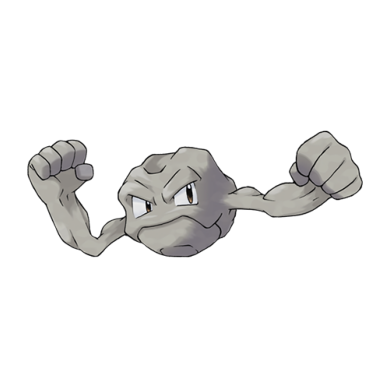

Psychic:
	Drowzee:
		Abilities: insomnia, forewarn, inner-focus
		Weight: 324


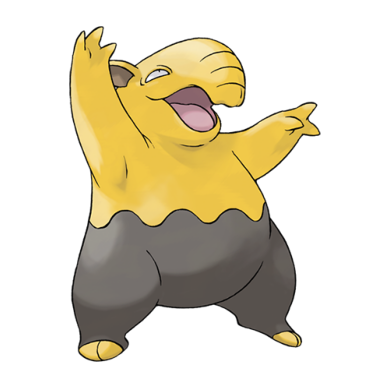

	Exeggcute:
		Abilities: chlorophyll, harvest
		Weight: 25


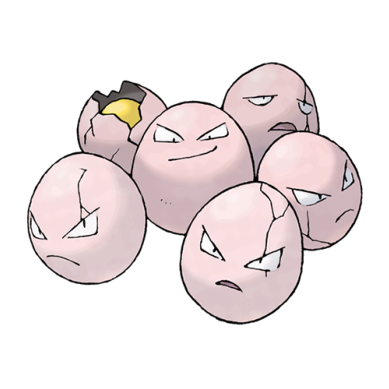

Dragon:
	Dratini:
		Abilities: shed-skin, marvel-scale
		Weight: 33


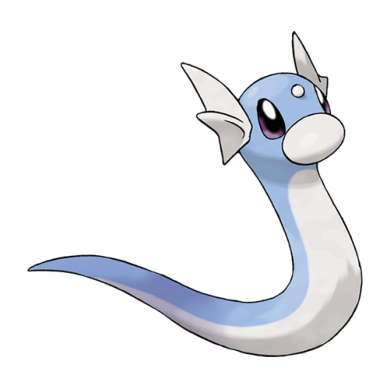

In [1]:
#!pip install matplotlib
import requests, json
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def fetch_pokemon_data(pokemon_name):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data")
        return None
    
def extract_pokemon_info(pokemon_data):
    name = pokemon_data['name']
    abilities = [ability['ability']['name'] for ability in pokemon_data['abilities']]
    types = [type_data['type']['name'] for type_data in pokemon_data['types']]
    weight = pokemon_data['weight']
    sprite_url = pokemon_data['sprites']['other']['official-artwork']['front_default']
    return name, abilities, types, weight, sprite_url


def categorize_pokemon_by_type(pokemon_list):
    categorized_pokemon = {}
    for pokemon in pokemon_list:
        name, abilities, types, weight, sprite_url = pokemon
        for pokemon_type in types:
            if pokemon_type not in categorized_pokemon:
                categorized_pokemon[pokemon_type] = {}
            categorized_pokemon[pokemon_type][name] = {'abilities': abilities, 'weight': weight, 'sprite_url': sprite_url}
    return categorized_pokemon


def create_pokemon(pokemon_names):
    pokemon_list = []
    for name in pokemon_names:
        pokemon_data = fetch_pokemon_data(name)
        if pokemon_data:
            info = extract_pokemon_info(pokemon_data)
            pokemon_list.append(info)
    return pokemon_list

def print_pokemon_with_image(categorized_pokemon):
    for pokemon_type, pokemon_dict in categorized_pokemon.items():
        print(pokemon_type.capitalize() + ":")
        for pokemon_name, pokemon_info in pokemon_dict.items():
            print(f"\t{pokemon_name.capitalize()}:")
            print(f"\t\tAbilities: {', '.join(pokemon_info['abilities'])}")
            print(f"\t\tWeight: {pokemon_info['weight']}")
            sprite_url = pokemon_info['sprite_url']
            if sprite_url:
                display_image_from_url(sprite_url)
            else:
                print("\t\tSprite not found")
                
def display_image_from_url(image_url):
    response = requests.get(image_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print("Error fetching image")


pokemon_names = ['bulbasaur', 'charmander', 'squirtle', 'pikachu', 'jigglypuff',
                 'meowth', 'psyduck', 'growlithe', 'machop', 'tentacool',
                 'geodude', 'drowzee', 'exeggcute', 'lickitung', 'magikarp',
                 'eevee', 'snorlax', 'dratini', 'cyndaquil', 'totodile']

pokemon_data = create_pokemon(pokemon_names)
categorized_pokemon = categorize_pokemon_by_type(pokemon_data)


print_pokemon_with_image(categorized_pokemon)

